# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df = pd.read_csv('ex1_mod07.csv', index_col=0)
df

y = df['mau']
X = df.drop('mau', axis=1)
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

(11655, 28)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [3]:
#2) 1.
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [4]:
#2) 2.
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

[Text(0.6154689915853948, 0.9814814814814815, 'X[5] <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]'),
 Text(0.3564717010585157, 0.9444444444444444, 'X[5] <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]'),
 Text(0.2298796533063749, 0.9074074074074074, 'X[4] <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]'),
 Text(0.06622264509990486, 0.8703703703703703, 'X[16] <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]'),
 Text(0.050237868696479546, 0.8333333333333334, 'X[4] <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]'),
 Text(0.03653663177925785, 0.7962962962962963, 'X[21] <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]'),
 Text(0.018268315889628926, 0.7592592592592593, 'X[5] <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]'),
 Text(0.012178877259752616, 0.7222222222222222, 'X[4] <= 24.782\ngini = 0.126\nsamples = 59\nvalue = [55, 4]'),
 Text(0.009134157944814463, 0.6851851851851852, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]

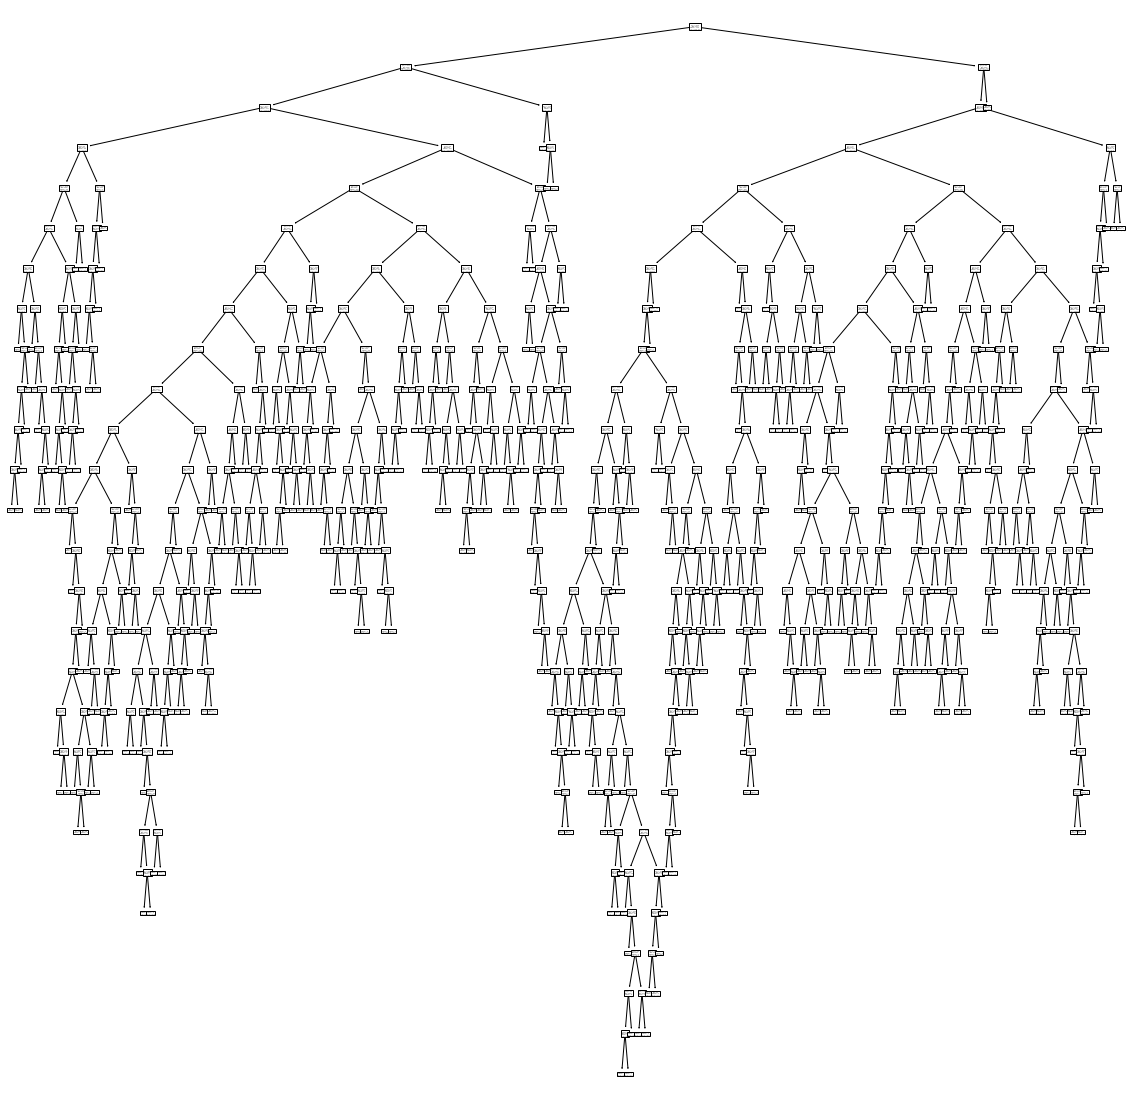

In [6]:
#2) 3. 
plt.figure(figsize=(20,20))
plot_tree(clf)

/home/joao/Desktop/ebac/ebac/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


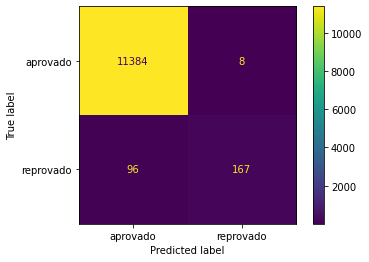

In [30]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovado', 'reprovado'])

In [21]:
accuracy_score(y_train, clf.predict(X_train))

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

[Text(0.5358195754716981, 0.9772727272727273, 'X[5] <= 2.632\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]'),
 Text(0.23478320029027577, 0.9318181818181818, 'X[4] <= 30.492\ngini = 0.077\nsamples = 1694\nvalue = [1626, 68]'),
 Text(0.0783744557329463, 0.8863636363636364, 'X[4] <= 30.378\ngini = 0.174\nsamples = 218\nvalue = [197, 21]'),
 Text(0.07256894049346879, 0.8409090909090909, 'X[5] <= 2.37\ngini = 0.153\nsamples = 215\nvalue = [197, 18]'),
 Text(0.04644412191582003, 0.7954545454545454, 'X[21] <= 0.5\ngini = 0.114\nsamples = 198\nvalue = [186, 12]'),
 Text(0.02902757619738752, 0.75, 'X[9] <= 0.5\ngini = 0.043\nsamples = 137\nvalue = [134, 3]'),
 Text(0.011611030478955007, 0.7045454545454546, 'X[12] <= 0.5\ngini = 0.016\nsamples = 123\nvalue = [122, 1]'),
 Text(0.005805515239477504, 0.6590909090909091, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'),
 Text(0.01741654571843251, 0.6590909090909091, 'X[0] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.011611030478955

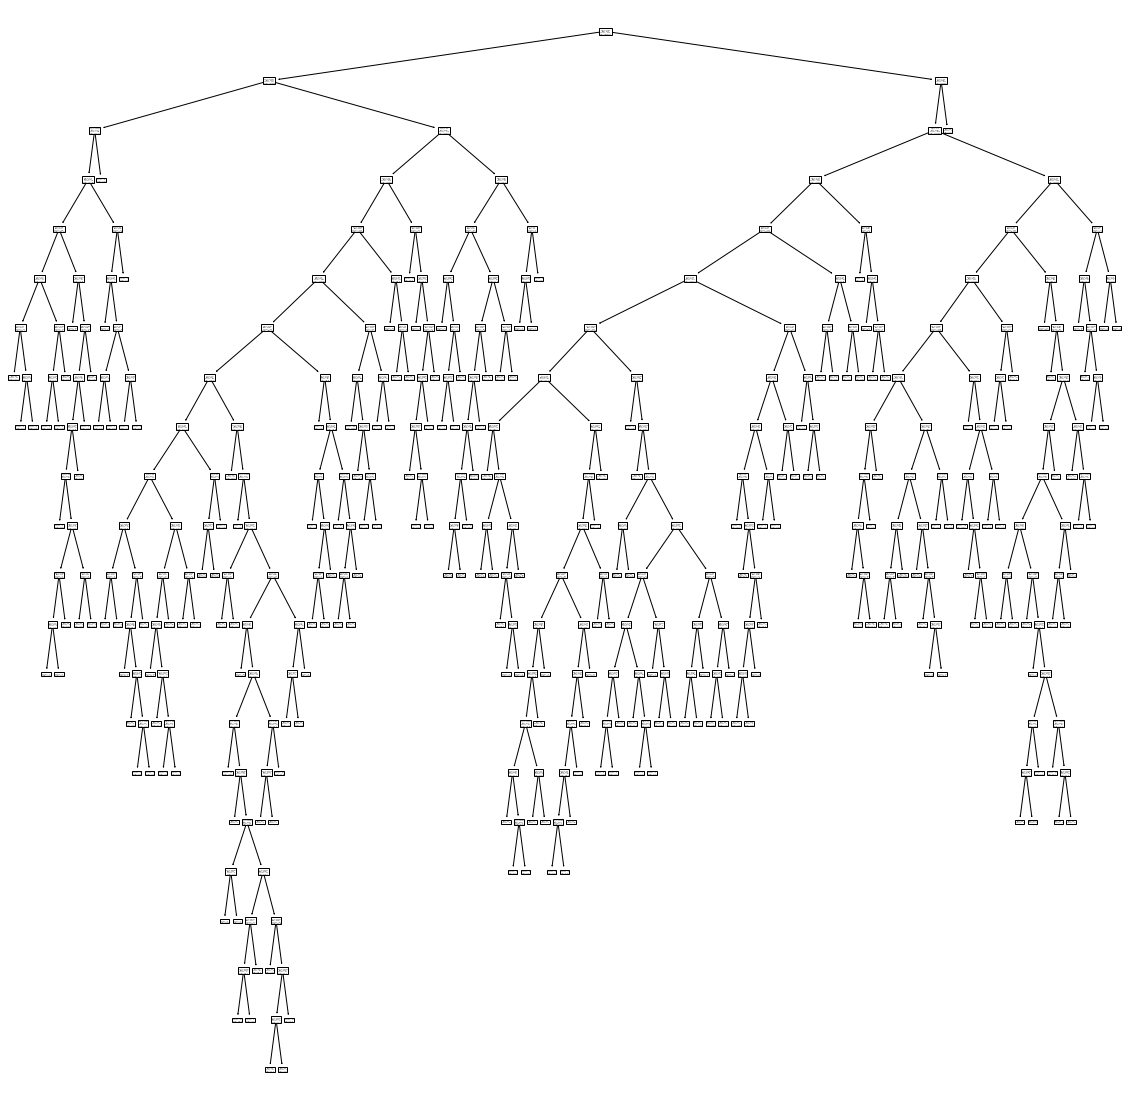

In [23]:
#3)1. 
test_clf = DecisionTreeClassifier(random_state=100)
test_clf.fit(X_test, y_test)
plt.figure(figsize=(20,20))
plot_tree(test_clf)

/home/joao/Desktop/ebac/ebac/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


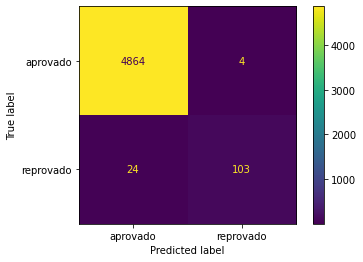

In [43]:
#3)2. 
plot_confusion_matrix(test_clf, X_test, y_test, display_labels=['aprovado','reprovado'])

In [44]:
#3)3. 
accuracy_score(y_test, test_clf.predict(X_test))

0.9943943943943944

/home/joao/Desktop/ebac/ebac/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9769769769769769

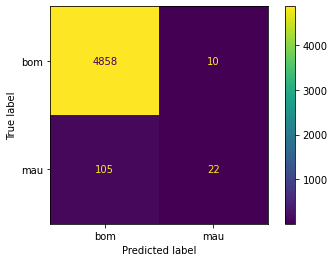

In [48]:
#3)4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. 
# Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
new_tree = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
new_tree.fit(X_test, y_test)
plot_confusion_matrix(new_tree, X_test, y_test, display_labels=['bom','mau'])
y_chapeu = new_tree.predict(X_test)
accuracy_score(y_test, y_chapeu)
#proporção de 'maus' é de (10+22)/4995 = 0.0064064


In [41]:
#5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
#4868  0
#127   0
#4868 / 4995 = 0.97457457